In [22]:
#Preambule
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
from matplotlib import rcParams
from scipy.integrate import quad
from scipy.interpolate import interp1d

# Display plot here
%matplotlib inline

# Main directory
main_dir = '/Users/Francis-yan/Work/Quintessential_DM/'

#Directory Structure
base_dir_2n = main_dir + 'class_rnr/output/'
base_dir_2n_old = main_dir + 'class/output/'
#base_dir_cos = main_dir + 'class_cosine/output/'
#base_dir_fluid = '/Users/Francis-yan/Work/EDE/class_EDE/output/'
data_dir = main_dir + 'class/data/'# Initialize the figure


In [23]:
# Set plot properties
rcParams['font.family'] = 'serif'
rcParams['text.usetex'] = True

lw_array = [1.5,1.5,1.5,1,2,2.5,2]
ls_array = ['--','-','--','-','-.','-','-']
col_array = ['k','k','r','b','m','g','c']

In [24]:
#File roots to plot (it will automaticaly plot all the models listed here)
rootplot_2n = ['lcdm','test']#,'LCDM_TEfull_BAOhlz_Lens_H0_Pant_bf','LCDM_Neff_TEfull_BAOhlz_Lens_H0_Pant_bf','Phi4_TEfull_BAOhlz_Lens_H0_Pant_bf','Phi6_TEfull_BAOhlz_Lens_H0_Pant_bf'] #,'Phi8_TEfull_BAOhlz_Lens_H0_Pant_bf','Phi2n_TEfull_BAOhlz_Lens_H0_Pant_bf']
rootplot_2n_old = ['test']
rootplot_cos = []
rootplot_fluid = []
#labelplot = [r'$\Lambda{\rm CDM}$ (ref)',r'$\Lambda{\rm CDM}$',r'$N_{\rm eff}$',r'$V\propto\phi^4$',r'$V\propto\phi^6$',r'$V\propto(1-\cos{(\phi/f)})^3$',r'$n=3$ fluid']
labelplot = [r'$\Lambda{\rm CDM}$',r'New RNR',r'Old RNR',r'Energy Injection'] 
#model_type = ['LCDM','LCDM','Neff','scf','scf','scf','fld']
model_type = ['scf','scf','scf']
# For ratios of spectra, which model should be the baseline
to_compare = 0

In [25]:
#Load Lensed Cls, background evolution, and matter power spectrum
scalCls = []
background_evol = []
Pk = []
for index,root in enumerate(rootplot_2n):
    temp = np.genfromtxt(base_dir_2n + root + '_cl_lensed.dat',dtype=[('l','i8'),('TT','f8'),('EE','f8'),('BB','f8'),('TE','f8')])
    scalCls.append(temp)
    back = np.genfromtxt(base_dir_2n + root + '_background.dat')
    background_evol.append(back)
    pk_here = np.genfromtxt(base_dir_2n + root + '_pk.dat')
    Pk.append(pk_here)
    
for index,root in enumerate(rootplot_2n_old):
    temp = np.genfromtxt(base_dir_2n_old + root + '_cl_lensed.dat',dtype=[('l','i8'),('TT','f8'),('EE','f8'),('BB','f8'),('TE','f8')])
    scalCls.append(temp)
    back = np.genfromtxt(base_dir_2n_old + root + '_background.dat')
    background_evol.append(back)
    pk_here = np.genfromtxt(base_dir_2n_old + root + '_pk.dat')
    Pk.append(pk_here)    
    
# Now do cosine models    
#for index,root in enumerate(rootplot_cos):
#    temp = np.genfromtxt(base_dir_cos + root + '_cl_lensed.dat',dtype=[('l','i8'),('TT','f8'),('EE','f8'),('BB','f8'),('TE','f8')])
#    scalCls.append(temp)
#    back = np.genfromtxt(base_dir_cos + root + '_background.dat')
#    background_evol.append(back)
#    pk_here = np.genfromtxt(base_dir_cos + root + '_pk.dat')
#    Pk.append(pk_here)
    
# Now fluid models    
#for index,root in enumerate(rootplot_fluid):
#    temp = np.genfromtxt(base_dir_fluid + root + '_cl_lensed.dat',dtype=[('l','i8'),('TT','f8'),('EE','f8'),('BB','f8'),('TE','f8')])
#    scalCls.append(temp)
#    back = np.genfromtxt(base_dir_fluid + root + '_background.dat')
#    background_evol.append(back)
#    pk_here = np.genfromtxt(base_dir_fluid + root + '_pk.dat')
#    Pk.append(pk_here)

In [26]:
#Extract Spectra
#Initialize arrays
l=[]
ClsTT=[]
ClsTTl2=[]
ClsEE=[]
ClsTE=[]
ClsBB=[]

#Loop over spectra
for index in range(len(scalCls)):
    l.append(scalCls[index]['l'])
    ClsTT.append(scalCls[index]['TT'])
    ClsTTl2.append(scalCls[index]['l']**2*scalCls[index]['TT'])
    ClsEE.append(scalCls[index]['EE'])
    ClsTE.append(scalCls[index]['TE'])
    ClsBB.append(scalCls[index]['BB'])

In [27]:
#Load data for plotting
WMAP9TT =  np.genfromtxt(data_dir + 'wmap_binned_tt_spectrum_9yr_v5.txt',dtype=[('l','f8'),('lmin','i8'),('lmax','i8'),('TT','f8'),('dTT','f8'),('dTT1','f8'),('dTT2','f8')])
WMAP9EE =  np.genfromtxt(data_dir + 'wmap_binned_ee_spectrum_9yr_v5.txt',dtype=[('l','f8'),('lmin','i8'),('lmax','i8'),('EE','f8'),('dEE','f8'),('dEE1','f8'),('dEE2','f8')])
SPT =  np.genfromtxt(data_dir + 'cmb_bandpowers_spt.dat',dtype=[('l','f8'),('TT','f8'),('dTT','f8')])
ACT =  np.genfromtxt(data_dir + 'ACT_cl_3yr_v1.dat',dtype=[('l','f8'),('TT','f8'),('dTT','f8')])
ACTPolEE = np.genfromtxt(data_dir + 'ACTPOL_cl_cmb_ee.dat',dtype=[('l','f8'),('EE','f8'),('dEE','f8')])
ACTPolTE = np.genfromtxt(data_dir + 'ACTPOL_cl_cmb_te.dat',dtype=[('l','f8'),('TE','f8'),('dTE','f8')])
SPTPol = np.genfromtxt(data_dir + 'bandpowers_sptpol_500deg2_TTEETE.txt')
filePlanck = pyfits.open(data_dir + 'COM_PowerSpect_CMB_R2.02.fits')

In [28]:
#Extract Data
#Planck TT High-ell
Planck2 = filePlanck[7].data
lPlanck2 = np.int32(Planck2['ELL'])
TTPlanck2 =  Planck2['D_ELL']
dTTPlanck2 = Planck2['ERR']
TTl2Planck2 =  np.power(lPlanck2,2)*Planck2['D_ELL']
dTTl2Planck2 = np.power(lPlanck2,2)*Planck2['ERR']

#Planck TT Low-ell
Planck_low_l = filePlanck[1].data
lPlanck_low = np.int32(Planck_low_l['ELL'])
TTPlanck_low = Planck_low_l['D_ELL']
dUTTPlanck_low = Planck_low_l['ERRUP']
dDTTPlanck_low = Planck_low_l['ERRDOWN']

#Planck EE Low-ell
Planck_low_l_EE = filePlanck[3].data
lPlanck_low_EE = np.int32(Planck_low_l_EE['ELL'])
EEPlanck_low = Planck_low_l_EE['D_ELL']
dUEEPlanck_low = Planck_low_l_EE['ERRUP']
dDEEPlanck_low = Planck_low_l_EE['ERRDOWN']

#Planck EE High-ell
Planck2EE = filePlanck[11].data
lPlanck2EE = np.int32(Planck2EE['ELL'])
EEPlanck2 =  Planck2EE['D_ELL']
dEEPlanck2 = Planck2EE['ERR']

#Planck TE Low-ell
Planck_low_l_TE = filePlanck[2].data
lPlanck_low_TE = np.int32(Planck_low_l_TE['ELL'])
TEPlanck_low = Planck_low_l_TE['D_ELL']
dUTEPlanck_low = Planck_low_l_TE['ERRUP']
dDTEPlanck_low = Planck_low_l_TE['ERRDOWN']

#Planck TE High-ell
Planck2TE = filePlanck[9].data
lPlanck2TE = np.int32(Planck2TE['ELL'])
TEPlanck2 =  Planck2TE['D_ELL']
dTEPlanck2 = Planck2TE['ERR']

#WMAP TT
WlTT = WMAP9TT['l']
WTT = WMAP9TT['TT']
WdTT = WMAP9TT['dTT']

#WMAP EE
WlEE = WMAP9EE['l']
WlEEmin = WMAP9EE['lmin']
WlEEmax = WMAP9EE['lmax']
WEE = WMAP9EE['EE']
WdEE = WMAP9EE['dEE']

#SPT
Sl = SPT['l'][24:]
ST = Sl**2*SPT['TT'][24:]
SdT= Sl**2*SPT['dTT'][24:]

#ACT
ACTl = ACT['l'][13:]
ACTTT = ACTl**2*ACT['TT'][13:]
ACTdTT = ACTl**2*ACT['dTT'][13:]

#ACTPol
ACTPol_l_EE = ACTPolEE['l']
ACTPol_EE = ACTPol_l_EE*(ACTPol_l_EE+1)*ACTPolEE['EE']/(2*np.pi)
ACTPol_dEE = ACTPol_l_EE*(ACTPol_l_EE+1)*ACTPolEE['dEE']/(2*np.pi)

ACTPol_l_TE = ACTPolTE['l']
ACTPol_TE = ACTPol_l_TE*(ACTPol_l_TE+1)*ACTPolTE['TE']/(2*np.pi)
ACTPol_dTE = ACTPol_l_TE*(ACTPol_l_TE+1)*ACTPolTE['dTE']/(2*np.pi)


In [29]:
# BAO data
# taken from MontePython likelihood and data folders
baofile = data_dir + 'final_consensus_results_dM_Hz_fsig.txt'
baocovmfile = data_dir + 'final_consensus_covtot_dM_Hz_fsig.txt'

baodata=np.genfromtxt(baofile)
baoerrors=np.genfromtxt(baocovmfile)
rsfid = 147.78

# Process the BAO data
bao_zvals = np.array([baodata[0,0],baodata[3,0],baodata[6,0]])
bao_dMrs = baodata[::3,2] 
bao_Hzrs = baodata[1::3,2]
bao_dMrserrors=np.sqrt(np.diag(baoerrors)[::3])
bao_Hzrserrors=np.sqrt(np.diag(baoerrors)[1::3])


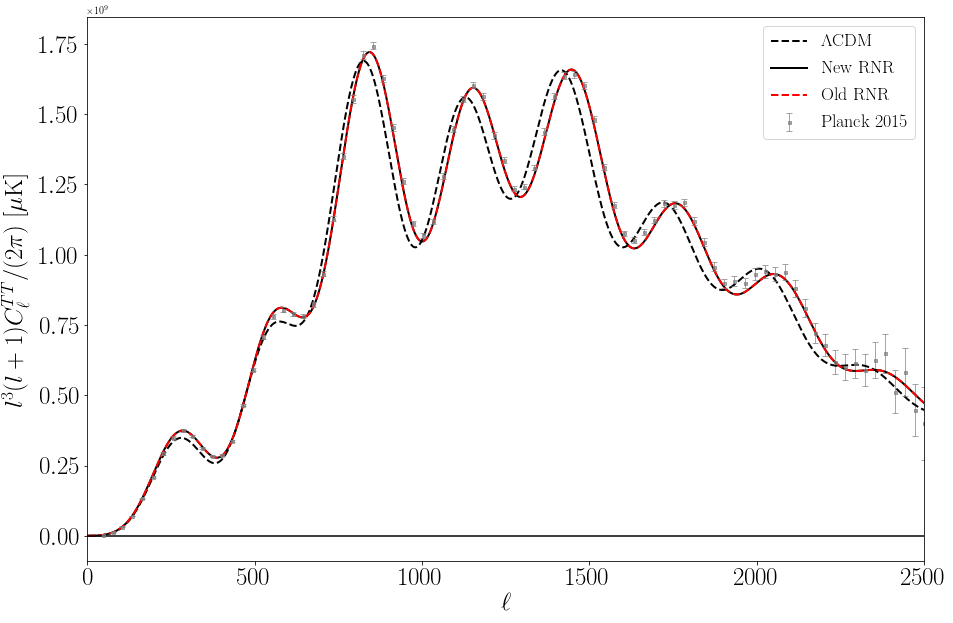

In [30]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(15,10))

# Choose figure properties
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0,2501)
#ax.set_ylim(-0.05,0.05)
ax.set_xlabel(r'$\ell$',size = 25)
ax.set_ylabel(r'$l^3(l+1) C_\ell^{TT}/(2\pi)$ [$\mu$K]',size = 25)
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
#Define interpolating function for LambdaCDM
#Cls_ref = interp1d(l[to_compare],ClsTT[to_compare],fill_value='extrapolate')

#Loop over spectra
for index in range(len(scalCls)):
    ax.plot(l[index],ClsTTl2[index] ,c=col_array[index],ls=ls_array[index],linewidth=2,label=labelplot[index])

#Plot the Planck data
ax.errorbar(lPlanck2,TTl2Planck2,dTTl2Planck2,fmt='s',color='gray',ms=3,label=r'$\rm Planck$ 2015',capsize = 3,elinewidth =1,alpha=0.7)

# Add the center line
ax.axhline(0,c='k',lw=1.5)

#The legend
ax.legend(loc = 'best',fontsize=18)

#Save the figure
#fig.savefig('ClsTT_highell_all_models.pdf',bbox_inches='tight')

# Make CMB residual plots

## Temperature plot

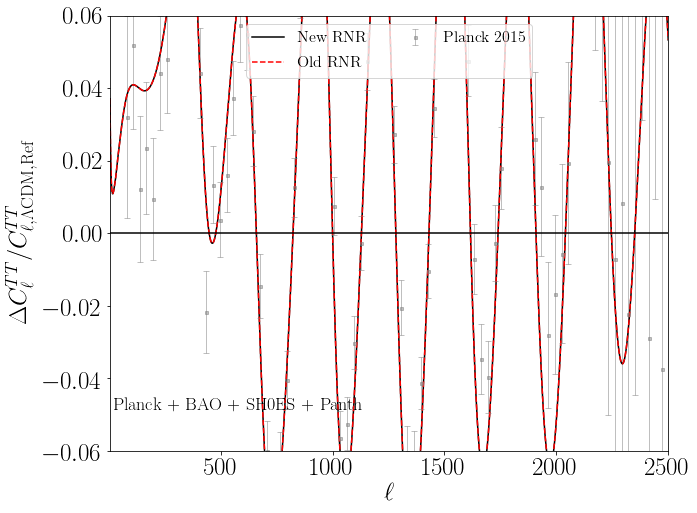

In [31]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(10,8))

# Choose figure properties
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(2,2501)
ax.set_ylim(-0.06,0.06)
ax.set_xlabel(r'$\ell$',size = 25)
ax.set_ylabel(r'$\Delta C_\ell^{TT}/C_{\ell,\Lambda{\rm CDM, Ref}}^{TT}$',size = 25)
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
#Define interpolating function for LambdaCDM
Cls_ref = interp1d(l[to_compare],ClsTT[to_compare],fill_value='extrapolate')

#Loop over spectra
for index in range(1,len(scalCls)):
    ax.plot(l[index],(ClsTT[index] - Cls_ref(l[index]))/Cls_ref(l[index]),c=col_array[index],ls=ls_array[index],linewidth=lw_array[index],label=labelplot[index])

#Plot the Planck data
ax.errorbar(lPlanck2,(TTPlanck2-Cls_ref(lPlanck2))/Cls_ref(lPlanck2),dTTPlanck2/Cls_ref(lPlanck2),fmt='s',color='gray',ms=3,label=r'$\rm Planck$ 2015',capsize = 3,elinewidth =1,alpha=0.5)

# Add the center line
ax.axhline(0,c='k',lw=1.5)

ax.text(15,-0.049,r'Planck + BAO + SH0ES + Panth',fontsize=18)

#The legend
ax.legend(loc='upper center',ncol=2,fontsize=16)

#Save the figure
#fig.savefig('ClsTT_residuals_highell.pdf',bbox_inches='tight')

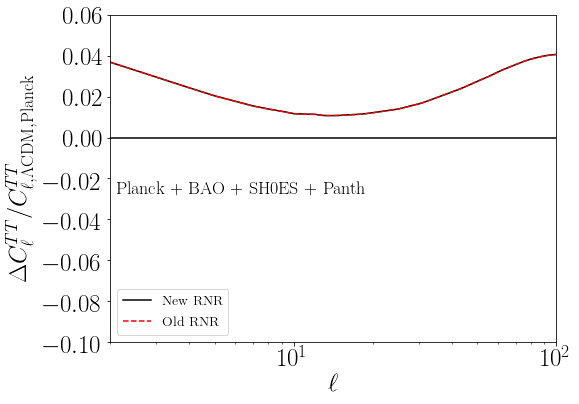

In [32]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(8,6))

# Choose figure properties
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(2,100)
ax.set_ylim(-0.1,0.06)
ax.set_xlabel(r'$\ell$',size = 25)
ax.set_ylabel(r'$\Delta C_\ell^{TT}/C_{\ell,\Lambda{\rm CDM, Planck}}^{TT}$',size = 25)
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')

#Define interpolating function for LambdaCDM
Cls_ref = interp1d(l[to_compare],ClsTT[to_compare],fill_value='extrapolate')
    
#Loop over spectra
for index in range(1,len(scalCls)):
    ax.plot(l[index],(ClsTT[index]-Cls_ref(l[index]))/Cls_ref(l[index]),c=col_array[index],ls=ls_array[index],lw=lw_array[index],label=labelplot[index])

#Plot the data
#ax.errorbar(lPlanck_low,(TTPlanck_low-Cls_ref(lPlanck_low))/Cls_ref(lPlanck_low),yerr = [dDTTPlanck_low, dUTTPlanck_low]/Cls_ref(lPlanck_low),xerr = None,fmt='s',c='gray',ms=4,label=r'Planck',capsize = 3,elinewidth =1,alpha=0.5)
#ax.errorbar(lPlanck2,(TTPlanck2-Cls_ref(lPlanck2))/Cls_ref(lPlanck2),dTTPlanck2/Cls_ref(lPlanck2),fmt='sk',ms=3,label=r'$\rm Planck$ 2015',capsize = 3,elinewidth =1)


# Add the center line
ax.axhline(0,c='k',lw=1.5)

ax.text(2.1,-0.028,r'Planck + BAO + SH0ES + Panth',fontsize=18)

#The legend
ax.legend(loc = 'best',fontsize=14)

#Save the figure
#fig.savefig('ClsTT_residuals_lowell.pdf',bbox_inches='tight')

## Polarization residuals

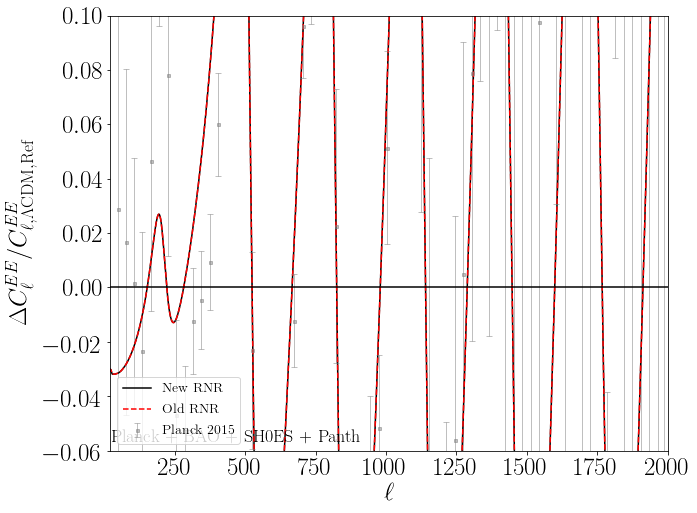

In [33]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(10,8))

# Choose figure properties
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(20,2001)
ax.set_ylim(-0.06,0.1)
ax.set_xlabel(r'$\ell$',size = 25)
ax.set_ylabel(r'$\Delta C_\ell^{EE}/C_{\ell,\Lambda{\rm CDM, Ref}}^{EE}$',size = 25)
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
#Define interpolating function for LambdaCDM
Cls_ref = interp1d(l[to_compare],ClsEE[to_compare],fill_value='extrapolate')

#Loop over spectra
for index in range(1,len(scalCls)):
    ax.plot(l[index],(ClsEE[index] - Cls_ref(l[index]))/Cls_ref(l[index]),c=col_array[index],ls=ls_array[index],linewidth=lw_array[index],label=labelplot[index])

#Plot the Planck data
ax.errorbar(lPlanck2EE,(EEPlanck2-Cls_ref(lPlanck2EE))/Cls_ref(lPlanck2EE),dEEPlanck2/Cls_ref(lPlanck2EE),fmt='s',color='gray',ms=3,label=r'$\rm Planck$ 2015',capsize = 3,elinewidth =1,alpha=0.5)

# Add the center line
ax.axhline(0,c='k',lw=1.5)

ax.text(22.8,-0.057,r'Planck + BAO + SH0ES + Panth',fontsize=18)

#The legend
ax.legend(loc = 'best',fontsize=14)

#Save the figure
#fig.savefig('ClsEE_residuals_highell.pdf',bbox_inches='tight')

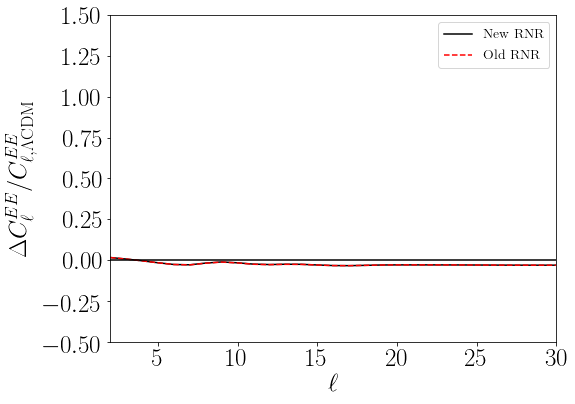

In [34]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(8,6))

# Choose figure properties
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(2,30)
ax.set_ylim(-0.5,1.5)
ax.set_xlabel(r'$\ell$',size = 25)
ax.set_ylabel(r'$\Delta C_\ell^{EE}/C_{\ell,\Lambda{\rm CDM}}^{EE}$',size = 25)
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')

#Define interpolating function for LambdaCDM
Cls_ref = interp1d(l[to_compare],ClsEE[to_compare],fill_value='extrapolate')
    
#Loop over spectra
for index in range(1,len(scalCls)):
    ax.plot(l[index],(ClsEE[index]-Cls_ref(l[index]))/Cls_ref(l[index]),c=col_array[index],ls=ls_array[index],linewidth=lw_array[index],label=labelplot[index])

#Plot the data
#ax.errorbar(lPlanck_low,(EEPlanck_low-Cls_ref(lPlanck_low))/Cls_ref(lPlanck_low),yerr = [dDEEPlanck_low, dUEEPlanck_low]/Cls_ref(lPlanck_low),xerr = None,fmt='s',color='gray',ms=4,label=r'Planck',capsize = 3,elinewidth =1,alpha=0.5)
#ax.errorbar(lPlanck2,(TTPlanck2-Cls_ref(lPlanck2))/Cls_ref(lPlanck2),dTTPlanck2/Cls_ref(lPlanck2),fmt='sk',ms=3,label=r'$\rm Planck$ 2015',capsize = 3,elinewidth =1)


# Add the center line
ax.axhline(0,c='k',lw=1.5)

#The legend
ax.legend(loc = 'best',fontsize=14)

#Save the figure
#fig.savefig('ClsEE_residuals_lowell.pdf',bbox_inches='tight')

# Plot $H(z)$

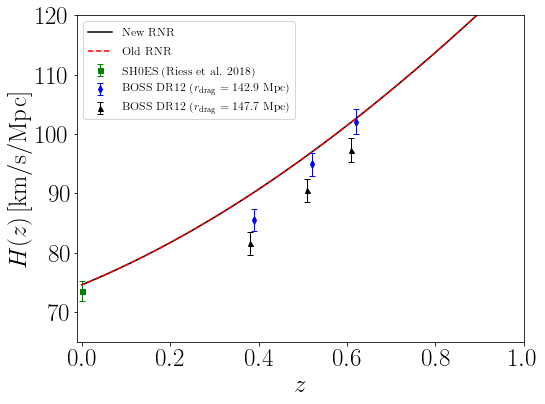

In [35]:
# Plot background
fig, ax = plt.subplots(figsize=(8,6))

clight = 2.99792e5

# Plot Hubble evolution
ax.set_xlabel(r'$z$',fontsize=25)
ax.set_ylabel(r'$H(z)\,[{\rm km/s/Mpc}]$',fontsize=25)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(-0.01,1)
ax.set_ylim(65,120)

# Loop over models
for index,back in enumerate(background_evol):
    if index == 3 or index == 1 or index == 2 or index == 6 or index == 5:
        ax.plot(back[:,0], clight*back[:,3],c=col_array[index],ls=ls_array[index],linewidth=lw_array[index], label=labelplot[index])

# Plot Riess 2018
hst_h      = 0.7352
hst_sigma  = 0.0162
ax.errorbar(0, 100*hst_h, 100*hst_sigma, fmt='sg',ms=5,label=r'SH0ES (Riess et al. 2018)',capsize = 3,elinewidth =1)

# Plot BOSS BAO
rsfid = 147.78
ax.errorbar(bao_zvals+0.01, (rsfid/140.855299)*bao_Hzrs, bao_Hzrserrors, fmt='db',ms=5,label=r'BOSS DR12 ($r_{\rm drag}=142.9$ Mpc)',capsize = 3,elinewidth =1)
ax.errorbar(bao_zvals, (rsfid/147.72)*bao_Hzrs, bao_Hzrserrors, fmt='^k',ms=5,label=r'BOSS DR12 ($r_{\rm drag}=147.7$ Mpc)',capsize = 3,elinewidth =1)    

ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    #label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=12)
#fig.savefig('Hubble_evolution.pdf',bbox_inches=None)

# Plot BAO

/Users/Francis-yan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


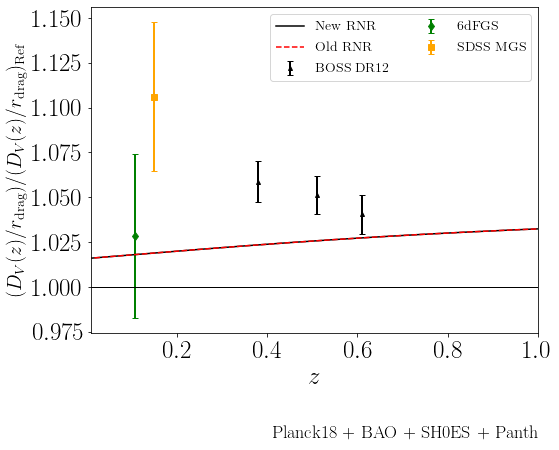

In [41]:
# Plot background dark matter density
fig, ax = plt.subplots(figsize=(8,6))

# Plot Density evolution
ax.set_xlabel(r'$z$',fontsize=25)
ax.set_ylabel(r'$(D_V(z)/r_{\rm drag})/(D_V(z)/r_{\rm drag})_{\rm Ref}$',fontsize=20)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0.01,1)
#ax.set_ylim(3,20)

#DR12 D_V measurements D_V()
DR12_DV = np.array([1477,1877,2140])
DR12_DV_err = np.array([16,19,22])


#Define interpolating function for LambdaCDM
back_ref = background_evol[to_compare]
DV_ref = interp1d(back_ref[:,0],(back_ref[:,0]*back_ref[:,4]**2/back_ref[:,3])**(1/3),fill_value='extrapolate')

rsfid = 147.78

r_drag_array = [147.716,140.319544,140.319544]
#r_drag_array = [147.3769,147.724142,145.0977,142.882162,144.068918,140.612,140.855299,145.682728]
#z_drag_array = [1059.5089,1059.685031,1060.904,1061.276685,1060.801883,1060.040132]

for index,back in enumerate(background_evol):
    if index > 0:
        # Compute D_V
        D_V = (back[:,0]*back[:,4]**2/back[:,3])**(1/3)
        ax.plot(back[:,0], (D_V/r_drag_array[index])/(DV_ref(back[:,0])/r_drag_array[to_compare]), c=col_array[index],ls=ls_array[index],linewidth=lw_array[index], label=labelplot[index])

#ax.errorbar(bao_zvals, bao_dMrs/(DM_ref(bao_zvals)), bao_dMrserrors/DM_ref(bao_zvals), fmt='sk',ms=3,label=r'DR12',capsize = 3,elinewidth =1)
ax.errorbar(bao_zvals, (DR12_DV/rsfid)/(DV_ref(bao_zvals)/r_drag_array[to_compare]) , (DR12_DV_err/rsfid)/(DV_ref(bao_zvals)/r_drag_array[to_compare]) , fmt='^k',ms=4,label=r'BOSS DR12',capsize = 3,elinewidth =2)   

ax.errorbar(0.106,2.976/(DV_ref(0.106)/r_drag_array[to_compare]),0.133/(DV_ref(0.106)/r_drag_array[to_compare]), label=r'6dFGS', fmt='dg',ms=6,capsize = 3,elinewidth =2)

ax.errorbar(0.15,(664/148.69)/(DV_ref(0.15)/r_drag_array[to_compare]),(25/148.69)/(DV_ref(0.15)/r_drag_array[to_compare]), label=r'SDSS MGS', fmt='s',color='orange',ms=6,capsize = 3,elinewidth =2)

ax.axhline(1,c='k',lw=1)
ax.text(0.41,0.915,r'Planck18 + BAO + SH0ES + Panth',fontsize=18)

ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    #label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',ncol=2,fontsize=14)

#fig.savefig('BAO_D_V_plot.pdf',bbox_inches='tight')


# Plot energy injection

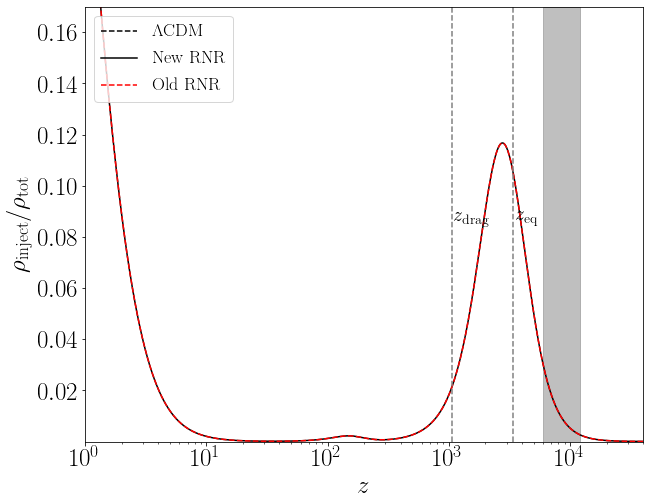

In [37]:
# Plot background
fig, ax = plt.subplots(figsize=(10,8))

# Plot Density evolution
ax.set_xlabel(r'$z$',fontsize=25)
ax.set_ylabel(r'$\rho_{\rm inject}/\rho_{\rm tot}$',fontsize=25)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(1,4e4)
ax.set_ylim(1e-6,.17)


# Loop over models
for index,back in enumerate(background_evol):
    if model_type[index] == 'Neff':
        back_to_comp = background_evol[to_compare]
        rho_inj = back[:,14]+ back[:,11] - back_to_comp[:,14] - back_to_comp[:,11]
        rho_tot = back[:,8] + back[:,9] + back[:,10] + back[:,14]+ back[:,11] + back[:,13]
        ax.plot(back[:,0], rho_inj/(rho_tot), c=col_array[index],ls=ls_array[index],lw=lw_array[index], label=labelplot[index])
    elif model_type[index] == 'fld':
        rho_inj = back[:,13] + back[:,14]
        rho_tot = back[:,8] + back[:,9] + back[:,10] + back[:,11] + rho_inj + back[:,18]
        ax.plot(back[:,0], (rho_inj)/(rho_tot), c=col_array[index],ls=ls_array[index],lw=lw_array[index], label=labelplot[index])  
    elif model_type[index] == 'scf':
        rho_inj = back[:,15]
        rho_tot = back[:,8] + back[:,9] + back[:,10] + back[:,11] + rho_inj + back[:,13]
        ax.plot(back[:,0], (rho_inj)/(rho_tot), c=col_array[index],ls=ls_array[index],lw=lw_array[index], label=labelplot[index])
    
ax.axvline(1060.,ls='--',c='gray')
ax.text(1090,0.085,r'$z_{\rm drag}$',fontsize=20)

ax.axvline(3400,ls='--',c='gray')
ax.text(3500,0.085,r'$z_{\rm eq}$',fontsize=20)

ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
#ax.text(12,0.0425,r'Planck + BAO + SH0ES + Panth',fontsize=16)
ax.axvspan(6000,12000,color='gray',alpha=0.5)
    
# The legend
ax.legend(loc = 'upper left',fontsize=18)

#fig.savefig('Energy_injection_kicp_wb.pdf',bbox_inches='tight')

# Plot the Equation of state

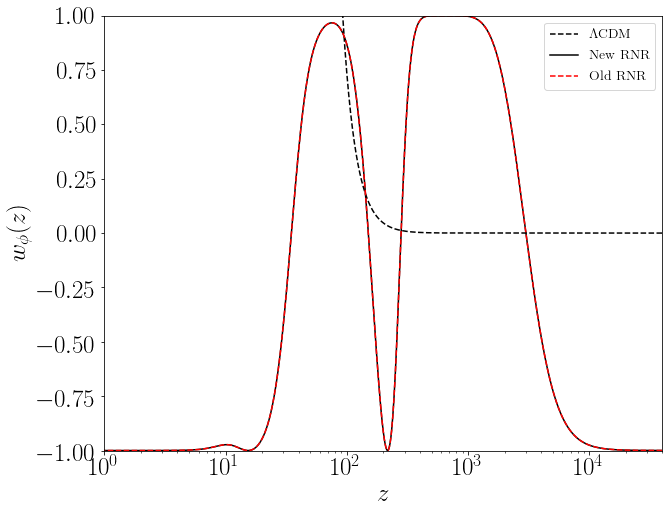

In [40]:
# Plot background
fig, ax = plt.subplots(figsize=(10,8))

# Plot Density evolution
ax.set_xlabel(r'$z$',fontsize=25)
ax.set_ylabel(r'$w_\phi(z)$',fontsize=25)
ax.set_xscale('log')
#ax1b.set_yscale('log')
ax.set_xlim(1,4e4)
ax.set_ylim(-1,1)

lw_array_h = [1.5,1.5,1.5,0.8,2,1,2]
alpha_array = [1,1,1,0.6,1,0.6,1]

# Loop over models
for index,back in enumerate(background_evol):
    if model_type[index] == 'scf':
        ax.plot(back[:,0], back[:,16]/back[:,15], c=col_array[index],ls=ls_array[index], lw=lw_array_h[index], label=labelplot[index], alpha=alpha_array[index])
    elif model_type[index] == 'fld':
         ax.plot(back[:,0], back[:,16], c=col_array[index],ls=ls_array[index], lw=lw_array_h[index], label=labelplot[index], alpha=alpha_array[index])
        
#index = 2     
#z = np.logspace(0,4.6,150)
#w2 = moving_average(z,index,0.8) 
#ax.plot(z, w2, c='k', lw=2, label=r'$\langle w_\phi(n=2)\rangle$')
#ax.axvline(1060.8,ls='--',c='gray')
#ax.text(1090,0.075,r'$z_{\rm drag}$',fontsize=20)
#ax.axhline(0.333333,ls='--',c='gray')

ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=14)

#fig.savefig('EoS_bestfit.pdf',bbox_inches='tight')

# Plot field evolution

IndexError: index 18 is out of bounds for axis 1 with size 18

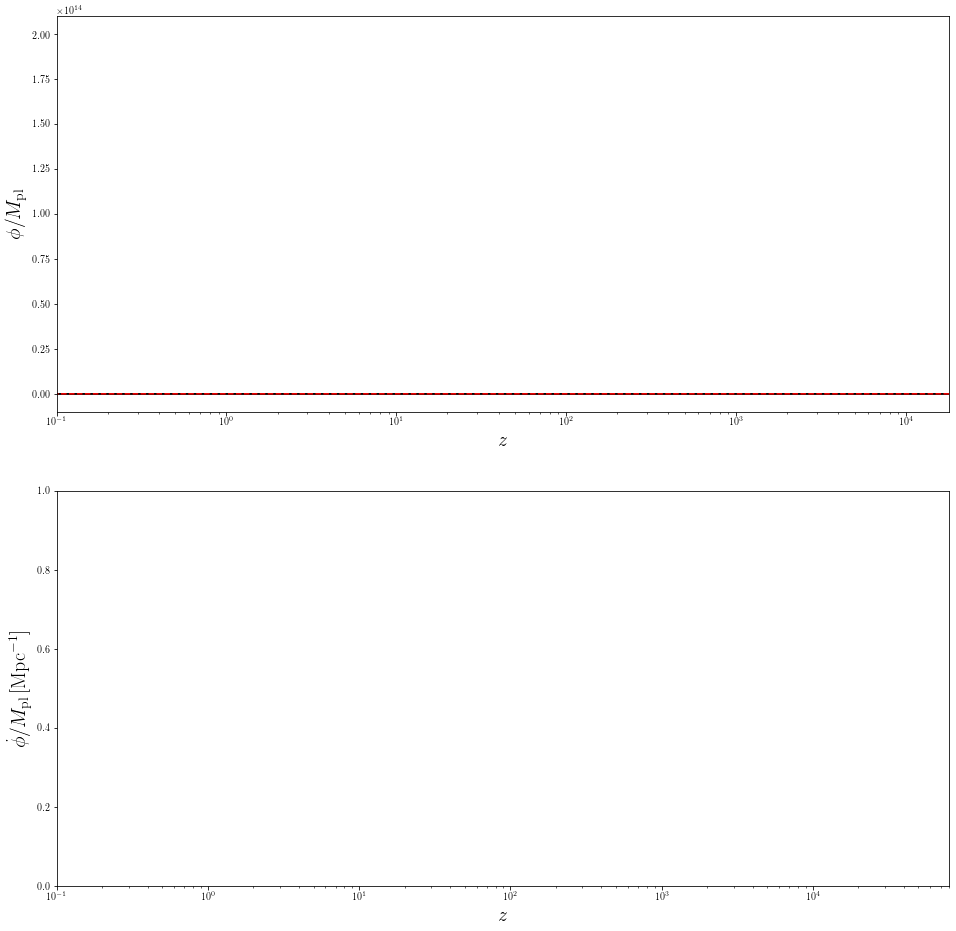

In [39]:
fig1, (ax1a,ax1c) = plt.subplots(2,1,figsize=(16,16))

#Plot phi
ax1a.set_xlabel(r'$z$',fontsize=20)
ax1a.set_ylabel(r'$\phi/M_{\rm pl}$',fontsize=20)
ax1a.set_xscale('log')
#ax1a.set_yscale('log')
ax1a.set_xlim(.1,1.8e4)
#ax1a.set_ylim(-0.25,0.75)
ax1a.axhline(1,c='k')

# Loop over models
for index,back in enumerate(background_evol):     
    if model_type[index] == 'scf':
        ax1a.plot(back[:,0], back[:,17], c=col_array[index], ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
        
# Plot phi dot
ax1c.set_xlabel(r'$z$',fontsize=20)
ax1c.set_ylabel(r'$\dot{\phi}/M_{\rm pl}\, [{\rm Mpc}^{-1}]$',fontsize=20)
ax1c.set_xscale('log')
#ax1c.set_yscale('log')
ax1c.set_xlim(1e-1,8e4)
#ax1c.set_ylim(1e-30,1e1)


# Loop over models
for index,back in enumerate(background_evol):       
    if model_type[index] == 'scf':
        ax1c.plot(back[:,0], back[:,18],  c=col_array[index], ls=ls_array[index], lw=lw_array[index], label=labelplot[index])

ticklabels = ax1a.get_xticklabels()
ticklabels.extend(ax1a.get_yticklabels())
ticklabels.extend(ax1c.get_xticklabels())
ticklabels.extend(ax1c.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    #label.set_fontname('Times New Roman')
    
# The legend
ax1a.legend(loc = 'best',fontsize=20)

In [ ]:
# Plot background dark matter density
fig1, ax1 = plt.subplots(3,1,figsize=(16,24))

# Plot potential
ax = ax1[0]
ax.set_xlabel(r'$\phi/M_{\rm pl}$',fontsize=20)
ax.set_ylabel(r'$V(\phi)\,[M_{\rm pl}^2 /{\rm Mpc}^2]$',fontsize=20)
ax.set_yscale('log')
#ax.set_xlim(-0.003,0.003)


# Loop over models
for index,back in enumerate(background_evol):
    if model_type[index] == 'scf':
        V = back[:,19]
        ax.plot(back[:,17], V, c=col_array[index], ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
    
    ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=20)

# Plot potential derivative
ax = ax1[1]
ax.set_xlabel(r'$\phi/M_{\rm pl}$',fontsize=20)
ax.set_ylabel(r'$-dV/d\phi\,[M_{\rm pl}^2 /{\rm Mpc}^2]$',fontsize=20)
#ax.set_xscale('log')
ax.set_yscale('log')


# Loop over models
for index,back in enumerate(background_evol):
    if model_type[index] == 'scf':
        Vp = back[:,20]
        ax.plot(back[:,17], -Vp, c=col_array[index], ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
    
    
ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=20)

# Plot the second derivative of the potential
ax = ax1[2]
ax.set_xlabel(r'$\phi/M_{\rm pl}$',fontsize=20)
ax.set_ylabel(r'$(1/V)d^2V/d\phi^2\,[1 /{\rm Mpc}^2]$',fontsize=20)
#ax.set_xscale('log')
#ax.set_yscale('log')

# Loop over models
for index,back in enumerate(background_evol):
    if model_type[index] == 'scf':
        V = back[:,19]
        Vpp = back[:,21]
        ax.plot(back[:,17], Vpp/V, c=col_array[index], ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
      
ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=20)

In [ ]:
def moving_average(z,index,delta = 0.2):
    back = background_evol[index]
    z_ref = back[:,0]
    w_ref = back[:,16]/back[:,15]
    w_int = interp1d(np.log(z_ref),w_ref)
    lzc = np.log(z)
    def integrand(lz):
        return w_int(lz)
    wave = np.zeros(lzc.shape)
    for i in range(lzc.size):
        wave[i] = quad(integrand,lzc[i]-delta,lzc[i]+delta,limit=500)[0]/(2*delta)
    return wave

# Plot growth factor

In [ ]:
# Plot background
fig, ax = plt.subplots(figsize=(8,6))

clight = 2.99792e5

# Plot Hubble evolution
ax.set_xlabel(r'$z$',fontsize=20)
ax.set_ylabel(r'$D_1(z)/D_{1,\Lambda{\rm CDM}}$',fontsize=20)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0.01,1e8)
ax.set_ylim(0.996,1.032)

Dcomp = background_evol[to_compare][:,16]
Dcomp_int = interp1d(background_evol[to_compare][:,0],Dcomp,fill_value='extrapolate')

# Loop over models
for index,back in enumerate(background_evol):
    if index > 0 and index < 3:
        D1 = back[:,16]
        ax.plot(back[:,0], D1/Dcomp_int(back[:,0]), c=col_array[index],ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
    elif index >= 3:
        D1 = back[:,22]
        ax.plot(back[:,0], D1/Dcomp_int(back[:,0]), c=col_array[index],ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
    

ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    #label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=16)

In [ ]:
# Plot background
fig, ax = plt.subplots(figsize=(8,6))

clight = 2.99792e5

# Plot Hubble evolution
ax.set_xlabel(r'$z$',fontsize=20)
ax.set_ylabel(r'$f(z)/f_{\Lambda{\rm CDM}}$',fontsize=20)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0.0,2)
ax.set_ylim(0.96,1.01)

Dcomp = background_evol[to_compare][:,17]
Dcomp_int = interp1d(background_evol[to_compare][:,0],Dcomp,fill_value='extrapolate')

# Loop over models
for index,back in enumerate(background_evol):
    if index > 0 and index < 3:
        D1 = back[:,17]
        ax.plot(back[:,0], D1/Dcomp_int(back[:,0]), c=col_array[index],ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
    elif index >= 3:
        D1 = back[:,23]
        ax.plot(back[:,0], D1/Dcomp_int(back[:,0]), c=col_array[index],ls=ls_array[index], lw=lw_array[index], label=labelplot[index])
    

ticklabels = ax.get_xticklabels()
ticklabels.extend(ax.get_yticklabels())
for label in ticklabels:
    label.set_color('k')
    label.set_fontsize(25)
    #label.set_fontname('Times New Roman')
    
# The legend
ax.legend(loc = 'best',fontsize=16)